In [1]:
pwd


'C:\\Users\\Ieva\\Desktop\\udacity'

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.pyplot as plt
#  %matplotlib inline
# extra setting to show all columns in descriptive statistics
pd.set_option('display.max_columns', 500)

In [3]:
%matplotlib inline

In [4]:
ls

 Volume in drive C is SSD
 Volume Serial Number is 7CAB-95E1

 Directory of C:\Users\Ieva\Desktop\udacity

01/08/2020  22:33    <DIR>          .
01/08/2020  22:33    <DIR>          ..
01/07/2020  23:03    <DIR>          .ipynb_checkpoints
01/07/2020  22:10             7,073 2.html
01/07/2020  22:12             1,866 4.html
01/06/2020  23:13       137,549,655 calendar_all.csv
01/06/2020  23:13        40,159,380 detailed_listings.csv
01/08/2020  21:58       196,727,368 detailed_reviews.csv
01/06/2020  23:13         1,230,805 listings.csv
01/07/2020  21:51         2,291,092 map.osm
01/07/2020  21:54         2,291,092 map.png
01/06/2020  23:13             2,781 neighbourhoods.csv
01/06/2020  23:13        10,444,884 reviews.csv
01/07/2020  22:08               825 test_map11.html
01/07/2020  21:33                86 token.mapbox_token
01/08/2020  22:33           727,916 Untitled.ipynb
01/07/2020  23:03           291,450 Untitled-Copy1.ipynb
              14 File(s)    391,726,273 bytes
      

#### Read data

In [157]:
# Availability by listing
calendar_all = pd.read_csv("calendar_all.csv")

In [6]:
listings = pd.read_csv("listings.csv")

In [7]:
detailed_listings = pd.read_csv("detailed_listings.csv", low_memory = False)

In [8]:
neighbourhoods = pd.read_csv("neighbourhoods.csv")

In [9]:
reviews = pd.read_csv("reviews.csv")

In [10]:
detailed_reviews = pd.read_csv("detailed_reviews.csv")

In [104]:
listings.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [108]:
listings.name.value_counts()

Hotel Locanda Herion - double room                    6
Apartment in the heart of Venice                      6
Alla Bianca Hotel-Economic Double Room                4
******* 15 minuts to Venice *******                   4
Ca' Leon D'Oro - Private room in Rialto free wifi     4
B&B VE-FUN|near Station|10mins to Venice              4
B&B "Castellani" Lido di Venezia                      4
Beautiful apartment with terrace                      3
Romantic room                                         3
In the heart of Venice                                3
Dream in Venice                                       3
Casa Cavaldoro Venezia                                3
Private Room                                          3
San Marco                                             3
Luxury Apartment -5 min from Train Station - Wi-Fi    3
Hotel Locanda Herion - Triple                         3
Triple Room                                           3
Home Sweet Home                                 

In [109]:
listings[listings['name'] == 'Hotel Locanda Herion - double room']

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
8271,37142609,Hotel Locanda Herion - double room,104994977,My Ovatta Srl,Isole,Cannaregio,45.44412,12.32755,Hotel room,79,1,0,NaN,NaN,97,353
8275,37143768,Hotel Locanda Herion - double room,104994977,My Ovatta Srl,Isole,Cannaregio,45.44393,12.32755,Hotel room,79,1,0,NaN,NaN,97,355
8276,37144062,Hotel Locanda Herion - double room,104994977,My Ovatta Srl,Isole,Cannaregio,45.44283,12.32698,Hotel room,79,1,0,NaN,NaN,97,358
8278,37144436,Hotel Locanda Herion - double room,104994977,My Ovatta Srl,Isole,Cannaregio,45.44411,12.32695,Hotel room,79,1,0,NaN,NaN,97,354
8284,37145524,Hotel Locanda Herion - double room,104994977,My Ovatta Srl,Isole,Cannaregio,45.44383,12.32883,Hotel room,79,1,0,NaN,NaN,97,356
8285,37145886,Hotel Locanda Herion - double room,104994977,My Ovatta Srl,Isole,Cannaregio,45.44286,12.32902,Hotel room,79,1,0,NaN,NaN,97,353


In [115]:
calendar_all.describe()

,listing_id,minimum_nights,maximum_nights
count,3.208350e+06,3.208350e+06,3.208350e+06
mean,1.991894e+07,2.243484e+00,5.824300e+02
std,1.159295e+07,3.578630e+00,5.300994e+02
min,6.623000e+03,1.000000e+00,1.000000e+00
25%,1.026149e+07,1.000000e+00,3.000000e+01
50%,2.031235e+07,2.000000e+00,3.650000e+02
75%,3.024921e+07,3.000000e+00,1.125000e+03
max,3.996219e+07,5.000000e+02,2.220000e+03


### Is there any difference of booked and available rooms by price?

In [164]:
calendar_all.head(1)

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights,price_float,adjusted_price_float
0,32261,2019-11-09,f,$69.00,$69.00,3,10,69.0,69.0


How many number of times each id is presented?

In [173]:
listing_id_count = calendar_all.groupby(['listing_id']).size()

In [180]:
listing_id_count.reset_index(name = "count").listing_id.nunique()

8790

Every listing is presented 365 times

In [ ]:
d = {'Missed':'Sum1', 'Credit':'Sum2','Grade':'Average'}
df=df.groupby('Name').agg({'Missed':'sum', 'Credit':'sum','Grade':'mean'}).rename(columns=d)
print (df)


Calculate average price by availability? How many properties have listings for the next 365 days?
8511 out of 8790 (~97%) properties have at least 1 listing. The average price of not available nights is 1450,76 while the average price of booked 145,87. This is 3 % lower. 

In [187]:
calendar_all.groupby("available").agg({'price_float' : 'mean', 'listing_id' : 'nunique'})

,price_float,listing_id
available,,
f,150.760850,8511
t,145.867374,8236


Price values modification because of $ symbol and column type. 

In [158]:
calendar_all['price_float'] = calendar_all.price.str.replace("[$, ]", "").astype("float")
calendar_all['adjusted_price_float'] = calendar_all.adjusted_price.str.replace("[$, ]", "").astype("float")


In [160]:
calendar_all.price_float.value_counts()

120.0     134645
100.0     123674
90.0      100402
150.0      98506
80.0       96493
110.0      92081
130.0      90892
140.0      71113
70.0       68255
60.0       61578
50.0       56361
200.0      54353
95.0       53843
85.0       51281
180.0      48682
65.0       47484
75.0       45863
99.0       45312
45.0       45102
160.0      43631
55.0       37431
125.0      37046
115.0      32003
105.0      31534
135.0      30336
89.0       30196
250.0      29937
40.0       28550
170.0      27281
69.0       26836
           ...  
615.0          1
838.0          1
990.0          1
612.0          1
845.0          1
632.0          1
586.0          1
587.0          1
925.0          1
857.0          1
883.0          1
591.0          1
1089.0         1
813.0          1
1125.0         1
1128.0         1
796.0          1
1140.0         1
1160.0         1
1190.0         1
561.0          1
788.0          1
623.0          1
624.0          1
625.0          1
626.0          1
762.0          1
2229.0        

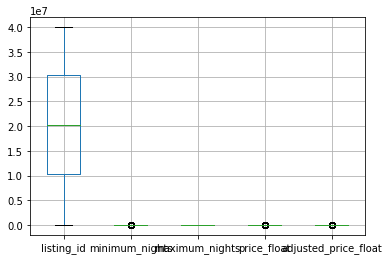

In [194]:
calendar_all.boxplot()

When is the peak season?

In [204]:
calendar_all.loc[calendar_all['available'] == 't', 'available_flag'] = 1
calendar_all.loc[calendar_all['available'] == 'f', 'available_flag'] = 0
calendar_all.loc[calendar_all['available'] == 't', 'not_available_flag'] = 0
calendar_all.loc[calendar_all['available'] == 'f', 'not_available_flag'] = 1

In [ ]:
calendar_all.groupby("available").agg({'price_float' : 'mean', 'listing_id' : 'nunique'})

In [216]:
aggregated_calendar_values = calendar_all.groupby("date").agg({'available_flag' : 'sum', 'not_available_flag' : 'sum', 'listing_id' : 'count'}).reset_index(name = "date")

TypeError: reset_index() got an unexpected keyword argument 'name'

In [212]:
aggregated_calendar_values['occupation'] = aggregated_calendar_values['available_flag'] / aggregated_calendar_values['listing_id']

In [213]:
aggregated_calendar_values.head(5)

,available_flag,not_available_flag,listing_id,occupation
date,,,,
2019-11-09,1446.0,7343.0,8789,0.164524
2019-11-10,3749.0,5040.0,8789,0.426556
2019-11-11,4820.0,3969.0,8789,0.548413
2019-11-12,5179.0,3610.0,8789,0.589259
2019-11-13,5245.0,3544.0,8789,0.596769


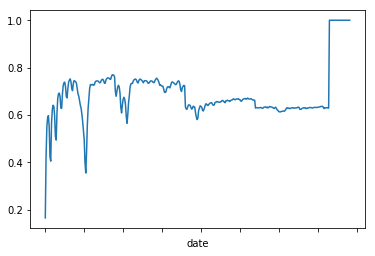

In [214]:
aggregated_calendar_values.occupation.plot.line()

In [215]:
aggregated_calendar_values.dtypes

available_flag        float64
not_available_flag    float64
listing_id              int64
occupation            float64
dtype: object

In [ ]:
new_df = pd.merge(A_df, B_df,  how='left', left_on=['A_c1','c2'], right_on = ['B_c1','c2'])

In [153]:
calendar_all.dtypes

listing_id          int64
date               object
available          object
price             float64
adjusted_price     object
minimum_nights      int64
maximum_nights      int64
dtype: object

In [140]:
calendar_all.count

<bound method DataFrame.count of          listing_id        date available    price adjusted_price  \
0             32261  2019-11-09         f   $69.00         $69.00   
1              6623  2019-11-09         f  $225.00        $225.00   
2              6623  2019-11-10         t  $225.00        $225.00   
3              6623  2019-11-11         t  $225.00        $225.00   
4              6623  2019-11-12         t  $225.00        $225.00   
5              6623  2019-11-13         t  $225.00        $225.00   
6              6623  2019-11-14         t  $225.00        $225.00   
7              6623  2019-11-15         t  $225.00        $225.00   
8              6623  2019-11-16         t  $160.00        $160.00   
9              6623  2019-11-17         t  $160.00        $160.00   
10             6623  2019-11-18         t  $160.00        $160.00   
11             6623  2019-11-19         t  $160.00        $160.00   
12             6623  2019-11-20         t  $160.00        $160.00   
1

In [139]:
calendar_all['a'] = calendar_all['price'].fillna("no review", inplace = True)
calendar_all

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights,new_price,a
0,32261,2019-11-09,f,$69.00,$69.00,3,10,$69.00,None
1,6623,2019-11-09,f,$225.00,$225.00,6,1125,$225.00,None
2,6623,2019-11-10,t,$225.00,$225.00,6,1125,$225.00,None
3,6623,2019-11-11,t,$225.00,$225.00,6,1125,$225.00,None
4,6623,2019-11-12,t,$225.00,$225.00,6,1125,$225.00,None
5,6623,2019-11-13,t,$225.00,$225.00,6,1125,$225.00,None
6,6623,2019-11-14,t,$225.00,$225.00,6,1125,$225.00,None
7,6623,2019-11-15,t,$225.00,$225.00,6,1125,$225.00,None
8,6623,2019-11-16,t,$160.00,$160.00,6,1125,$160.00,None
9,6623,2019-11-17,t,$160.00,$160.00,6,1125,$160.00,None


In [128]:
calendar_all[calendar_all['listing_id'] == 37142609]

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights,new_price
3028726,37142609,2019-11-09,f,$116.00,$116.00,1,30,$116.00
3029067,37142609,2019-11-10,f,$79.00,$79.00,1,30,$79.00
3029068,37142609,2019-11-11,t,$79.00,$79.00,1,30,$79.00
3029069,37142609,2019-11-12,t,$79.00,$79.00,1,30,$79.00
3029070,37142609,2019-11-13,f,$79.00,$79.00,1,30,$79.00
3029071,37142609,2019-11-14,t,$79.00,$79.00,1,30,$79.00
3029072,37142609,2019-11-15,f,$79.00,$79.00,1,30,$79.00
3029073,37142609,2019-11-16,f,$116.00,$116.00,1,30,$116.00
3029074,37142609,2019-11-17,f,$79.00,$79.00,1,30,$79.00
3029075,37142609,2019-11-18,t,$79.00,$79.00,1,30,$79.00


In [107]:
listings.host_name.value_counts()

Andrea                  161
City Apartments         126
Paolo                   118
Valentina               112
Marco                   109
My Ovatta Srl            97
Francesca                86
Stefano                  84
Silvia                   79
Nicola                   77
Luca                     77
Chiara                   77
Laura                    76
Rent It Venice           75
Viewsonvenice            75
Anna                     75
Roberto                  70
Elena                    67
Raffaella                67
Francesco                63
Monica                   57
Cristina                 55
Alessandro               54
Davide                   54
Barbara                  52
Alessandra               52
Massimo                  51
Paola                    51
Elisabetta               50
Giulia                   48
                       ... 
Catharine Francesca       1
James & Amber             1
Nurisa & Nuria            1
Gian Andrea               1
JiaHang             

###### Plot missing data chart

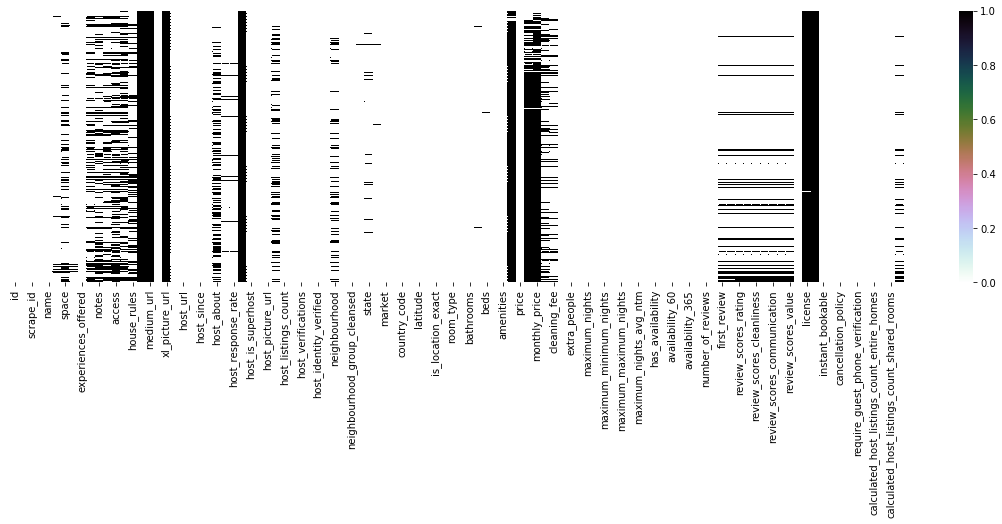

In [11]:
fig, ax = plt.subplots(figsize = (20, 5))
sns.heatmap(detailed_listings.isna(), cmap = "cubehelix_r", yticklabels='')
plt.show()

In [45]:
calendar_all.head(5)

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,32261,2019-11-09,f,$69.00,$69.00,3,10
1,6623,2019-11-09,f,$225.00,$225.00,6,1125
2,6623,2019-11-10,t,$225.00,$225.00,6,1125
3,6623,2019-11-11,t,$225.00,$225.00,6,1125
4,6623,2019-11-12,t,$225.00,$225.00,6,1125


In [46]:
listings.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,6623,Venice Blue on Canal apartment,15016,Francesca,Isole,San Polo,45.43823,12.32902,Entire home/apt,225,6,162,2019-11-06,1.33,3,351
1,6624,Venice garden charme and canal view!,15016,Francesca,Isole,San Polo,45.43845,12.32869,Entire home/apt,272,7,63,2019-09-24,0.64,3,342
2,12074,Venice home to relax and emotions,15016,Francesca,Isole,San Polo,45.43827,12.32764,Entire home/apt,122,4,184,2019-10-07,1.58,3,355
3,27116,Charming room with balcony close to S. Mark's,116144,Gianni,Isole,San Marco,45.43221,12.33411,Private room,190,1,408,2019-10-05,3.62,2,292
4,27574,MINI APARTMENT 30 MT FROM GRAND CANAL,119219,Elisa,Isole,Santa Croce,45.44031,12.32313,Entire home/apt,94,2,254,2019-10-12,2.25,6,9


In [50]:
neighbourhoods.head(10)

,neighbourhood_group,neighbourhood
0,Isole,Alberoni
1,Isole,Burano
2,Isole,Cannaregio
3,Isole,Castello
4,Isole,Dorsoduro
5,Isole,Giudecca
6,Isole,Isola Buel del Lovo
7,Isole,Isola Campalto
8,Isole,Isola Carbonera
9,Isole,Isola Cason Grassabo'


In [51]:
reviews.head(5)

,listing_id,date
0,6623,2009-11-15
1,6623,2010-04-04
2,6623,2011-03-06
3,6623,2011-03-19
4,6623,2011-09-07


In [57]:
detailed_listings

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,6623,https://www.airbnb.com/rooms/6623,20191109094753,2019-11-09,Venice Blue on Canal apartment,"I'm thrilled to share my ""Blue on Venice Canal...",Just off San Polo square and 10 mins. from Ria...,"I'm thrilled to share my ""Blue on Venice Canal...",none,Close by is the Frari Church (known as Tiziano...,...,t,f,strict_new,f,t,3,3,0,0,1.33
1,6624,https://www.airbnb.com/rooms/6624,20191109094753,2019-11-09,Venice garden charme and canal view!,I'm thrilled to share my apartment with garden...,Just off San Polo square and 10 mins. from Ria...,I'm thrilled to share my apartment with garden...,none,We are in the middle of a residential area cal...,...,t,f,strict_new,f,t,3,3,0,0,0.64
2,12074,https://www.airbnb.com/rooms/12074,20191109094753,2019-11-09,Venice home to relax and emotions,I'm thrilled to share my home to guests coming...,"Beautiful, 2 bedrooms 2 bathrooms with garden,...",I'm thrilled to share my home to guests coming...,none,"There are plenty of bars, restaurants and pizz...",...,f,f,strict_new,f,t,3,3,0,0,1.58
3,27116,https://www.airbnb.com/rooms/27116,20191109094753,2019-11-09,Charming room with balcony close to S. Mark's,"Few steps from Saint Mark square, on a picture...","Our b&b is located in the heart of Venice, clo...","Few steps from Saint Mark square, on a picture...",none,"The area is very beautiful and characteristic,...",...,f,f,strict_new,f,f,2,0,2,0,3.62
4,27574,https://www.airbnb.com/rooms/27574,20191109094753,2019-11-09,MINI APARTMENT 30 MT FROM GRAND CANAL,Cozy sweet apartment for two people for short ...,A cosy new accommodation to rent in a privileg...,Cozy sweet apartment for two people for short ...,none,The area is full of attractions of historical ...,...,t,f,moderate_new,f,f,6,5,1,0,2.25
5,32261,https://www.airbnb.com/rooms/32261,20191109094753,2019-11-09,"Venice, close to Biennale exhibition",In 35 square meters you can find all you need ...,"Studio with a very nice price, a warm alcove i...",In 35 square meters you can find all you need ...,none,"This part of Venice is unique, close to a very...",...,t,f,moderate_new,f,f,1,1,0,0,1.60
6,33934,https://www.airbnb.com/rooms/33934,20191109094753,2019-11-09,LOVELY APARTMENT IN THE CENTER,Apartment in a very lively tipical Venetian st...,"Apartment Abbazia, holiday apartment in histor...",Apartment in a very lively tipical Venetian st...,none,The neighbourhood is not touristy but very typ...,...,t,f,moderate_new,f,f,6,5,1,0,1.19
7,44527,https://www.airbnb.com/rooms/44527,20191109094753,2019-11-09,Historical Luxury Apartment on Calm Sunny Canal,Descend a spiral staircase to discover an apar...,"The apartment is a luxury , early gothic Palaz...",Descend a spiral staircase to discover an apar...,none,"Cannaregio is a well-connected, truly Venetian...",...,t,f,flexible_new,f,f,1,1,0,0,0.67
8,44998,https://www.airbnb.com/rooms/44998,20191109094753,2019-11-09,Furlani Loft for up to 6,LATE ARRIVAL POLICY - Please note that our ch...,A charismatic apartment that can accommodate 4...,LATE ARRIVAL POLICY - Please note that our ch...,none,NaN,...,t,f,moderate_new,f,f,12,12,0,0,0.04
9,45036,https://www.airbnb.com/rooms/45036,20191109094753,2019-11-09,San Toma Apartment - Venice,LATE ARRIVAL POLICY - Please note that our ch...,"Small and functional, ideal for couples. The ...",LATE ARRIVAL POLICY - Please note that our ch...,none,NaN,...,t,f,moderate_new,f,f,12,12,0,0,0.15


#### Evaluate missing data in every dataframe

In [62]:
detailed_listings.isnull().mean().sort_values(ascending = False)

thumbnail_url                                   1.000000
host_acceptance_rate                            1.000000
xl_picture_url                                  1.000000
medium_url                                      1.000000
jurisdiction_names                              0.999886
license                                         0.991923
square_feet                                     0.974403
monthly_price                                   0.920933
weekly_price                                    0.879636
access                                          0.445165
host_about                                      0.403641
interaction                                     0.395336
notes                                           0.355518
transit                                         0.324005
host_neighbourhood                              0.306826
neighborhood_overview                           0.294084
house_rules                                     0.281570
security_deposit               

In [63]:
listings.isnull().mean().sort_values(ascending = False)

reviews_per_month                 0.097838
last_review                       0.097838
host_name                         0.000569
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
neighbourhood_group               0.000000
host_id                           0.000000
name                              0.000000
id                                0.000000
dtype: float64

In [19]:
type(missing_values)

pandas.core.series.Series

In [21]:
missing_values.sort_values(ascending = False)


thumbnail_url                                   1.000000
host_acceptance_rate                            1.000000
xl_picture_url                                  1.000000
medium_url                                      1.000000
jurisdiction_names                              0.999886
license                                         0.991923
square_feet                                     0.974403
monthly_price                                   0.920933
weekly_price                                    0.879636
access                                          0.445165
host_about                                      0.403641
interaction                                     0.395336
notes                                           0.355518
transit                                         0.324005
host_neighbourhood                              0.306826
neighborhood_overview                           0.294084
house_rules                                     0.281570
security_deposit               

In [65]:
calendar_all.isna().mean().sort_values(ascending = False)

adjusted_price    0.000053
price             0.000053
maximum_nights    0.000000
minimum_nights    0.000000
available         0.000000
date              0.000000
listing_id        0.000000
dtype: float64

In [66]:
neighbourhoods.isna().mean().sort_values(ascending = False)

neighbourhood          0.0
neighbourhood_group    0.0
dtype: float64

In [67]:
reviews.isna().mean().sort_values(ascending = False)

date          0.0
listing_id    0.0
dtype: float64

In [69]:
detailed_reviews.isna().mean().sort_values(ascending = False)

comments         0.000288
reviewer_name    0.000000
reviewer_id      0.000000
date             0.000000
id               0.000000
listing_id       0.000000
dtype: float64

##### Distributions of data

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000017684FD4780>,
      dtype=object)

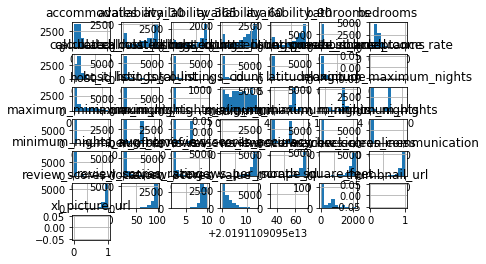

In [76]:
detailed_listings.hist()

In [21]:
int_detailed_listings = detailed_listings.select_dtypes(include=['int64'])

C:\Users\Ieva\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2961: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000011B90032CF8>,
      dtype=object)

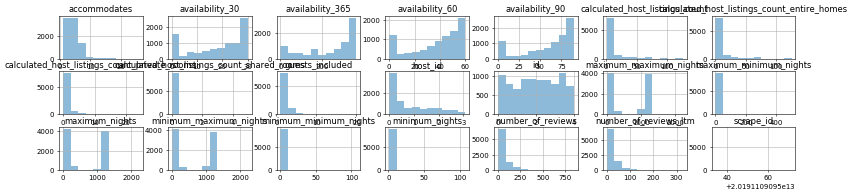

In [22]:
fig, ax = plt.subplots(figsize=(19,10), dpi=50)
int_detailed_listings.hist(ax=ax, layout=(7,7), alpha=0.5)

In [29]:
detailed_listings.drop(['id', 'scrape_id', 'thumbnail_url', 'medium_url', 'xl_picture_url', 'host_id', 'host_acceptance_rate'], axis = 1).describe()

,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,square_feet,guests_included,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,8785.000000,8785.000000,8790.000000,8790.000000,8790.000000,8787.000000,8788.000000,8781.000000,225.000000,8790.000000,8790.000000,8790.000000,8790.000000,8790.000000,8790.000000,8790.000000,8790.000000,8790.000000,8790.000000,8790.000000,8790.000000,8790.000000,8790.000000,8790.000000,7884.000000,7881.000000,7882.000000,7882.000000,7883.000000,7882.000000,7880.000000,8790.000000,8790.000000,8790.000000,8790.000000,7930.000000
mean,14.476836,14.476836,45.445572,12.318617,3.918999,1.309947,1.577720,2.510762,416.262222,1.927076,2.150171,560.286121,2.032651,2.813879,574.900569,590.873151,2.245063,582.428669,17.884642,37.253584,59.467235,240.557452,61.226849,19.970990,92.589168,9.572897,9.521695,9.625983,9.602309,9.748795,9.246954,11.068942,8.610466,1.166780,0.035267,2.364689
std,42.535640,42.535640,0.023390,0.040550,1.936420,1.270366,0.857154,1.582227,497.193892,1.346215,2.386716,532.626129,2.335098,6.190619,531.081442,528.889059,2.696942,528.658941,10.536907,19.596521,29.150720,122.682779,83.255841,24.130961,7.939118,0.751342,0.814068,0.724207,0.772057,0.553978,0.826136,21.733693,19.774115,3.175804,0.340511,2.186681
min,0.000000,0.000000,45.277560,12.173900,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.020000
25%,1.000000,1.000000,45.434150,12.322272,2.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,30.000000,1.000000,2.000000,30.000000,30.000000,1.300000,30.000000,10.000000,25.000000,44.000000,153.000000,5.000000,2.000000,90.000000,9.000000,9.000000,9.000000,9.000000,10.000000,9.000000,1.000000,1.000000,0.000000,0.000000,0.670000
50%,3.000000,3.000000,45.438430,12.330700,4.000000,1.000000,1.000000,2.000000,194.000000,2.000000,2.000000,365.000000,2.000000,2.000000,365.000000,999.000000,2.000000,500.000000,21.000000,43.000000,70.000000,296.000000,28.000000,11.000000,95.000000,10.000000,10.000000,10.000000,10.000000,10.000000,9.000000,3.000000,2.000000,0.000000,0.000000,1.730000
75%,10.000000,10.000000,45.445087,12.339970,5.000000,1.500000,2.000000,3.000000,753.000000,2.000000,3.000000,1125.000000,2.000000,3.000000,1125.000000,1125.000000,2.800000,1125.000000,27.000000,53.000000,83.000000,344.000000,84.000000,31.000000,98.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,9.000000,6.000000,1.000000,0.000000,3.490000
max,1242.000000,1242.000000,45.536850,12.420320,26.000000,105.500000,10.000000,16.000000,2153.000000,20.000000,107.000000,2220.000000,107.000000,500.000000,2220.000000,2220.000000,123.400000,2220.000000,30.000000,60.000000,90.000000,365.000000,845.000000,327.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,126.000000,126.000000,24.000000,5.000000,14.100000


In [32]:
# import numpy as np
# import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
% matplotlib inline

In [58]:
from nltk.corpus import stopwords 

In [61]:
# Need to download stopwords
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Ieva\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [62]:
stop_words = set(stopwords.words('english')) 

In [91]:
# Add location values in italian and english
stop_words.update(["Venice", "Venezia"])
stop_words.update(["us", "gave", "also"])
stop_words.update(["de", "la"])

In [92]:
print(stop_words)

{'this', 'through', 'before', 'any', 'some', 'off', "don't", 'but', 'their', 'between', 'Venezia', 'isn', 'more', "wouldn't", 'de', 'Venice', 'by', 'who', 'an', 'gave', 'myself', "hasn't", 'were', 'theirs', 'nor', 'doesn', 'his', 'up', 'hasn', 'we', 'if', 'am', 'to', 'what', 'then', "aren't", 'each', 'down', 'itself', 'you', 'don', "she's", 'over', 'doing', 'where', 'own', 'again', 'the', 've', 'my', "mustn't", 'these', 'under', 'having', 'from', 'she', "you'd", 'wasn', "didn't", 'our', 'hadn', 'shan', 'can', 'so', 'la', 'just', 'its', 'here', 'out', 'll', 'will', "you'll", 'no', "weren't", 'while', "isn't", 'and', 'weren', 'being', 'against', 'ain', 'into', 'both', 's', 't', 'for', 'after', 'with', 'has', 'didn', 'is', 'aren', "doesn't", 'such', 'too', 'he', 'below', "hadn't", 'than', 'or', 'why', 'most', 'whom', 'are', 'all', "shouldn't", 'o', 'ours', 'once', 'your', "you're", 'haven', "wasn't", 'because', "won't", 'us', 'was', "mightn't", 'same', 'themselves', 'few', 'd', "shan't", 

In [87]:
detailed_reviews["comments"].fillna("no review", inplace = True)

In [93]:
text = " ".join(review for review in detailed_reviews.comments)

In [94]:
wordcloud = WordCloud(max_font_size = 50, max_words = 150, background_color = "white", stopwords = stop_words).generate(text)

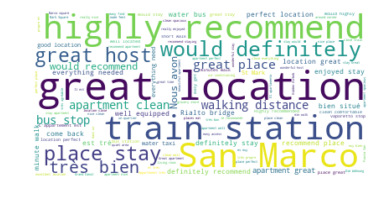

In [97]:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
wordcloud.to_file("reviews.png")

#### Sentiment analysis

In [100]:
from textblob import TextBlob
import nltk
# from newspaper import Article

In [101]:
nltk.download('punkt')#1 time download of the sentence tokenizer
# article.nlp()#  Keyword extraction wrapper

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Ieva\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [103]:
detailed_reviews.comments[0].nlp()

AttributeError: 'str' object has no attribute 'nlp'

#### Features relationship

ValueError: zero-size array to reduction operation minimum which has no identity

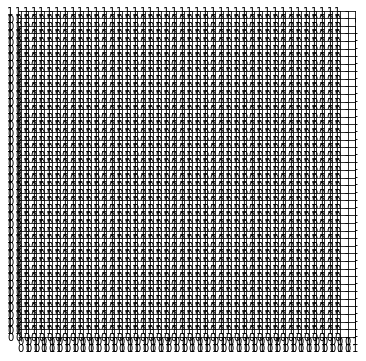

In [78]:
from pandas.plotting import scatter_matrix
scatter_matrix(detailed_listings, alpha=0.2, figsize=(6, 6), diagonal='kde')

In [27]:
temp = detailed_listings.dropna(how = "all")

In [28]:
temp.shape

(8790, 106)

In [42]:
detailed_listings.shape

(8790, 106)

In [43]:
corr(detailed_listings)

NameError: name 'corr' is not defined

In [39]:
corr = detailed_listings.corr(method="spearman")

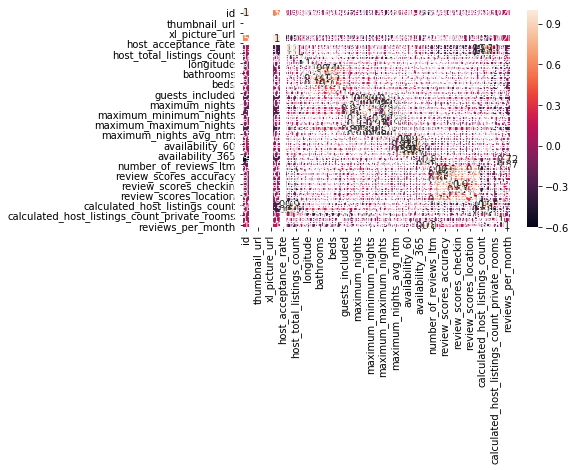

In [13]:
sns.heatmap(corr, annot=True)

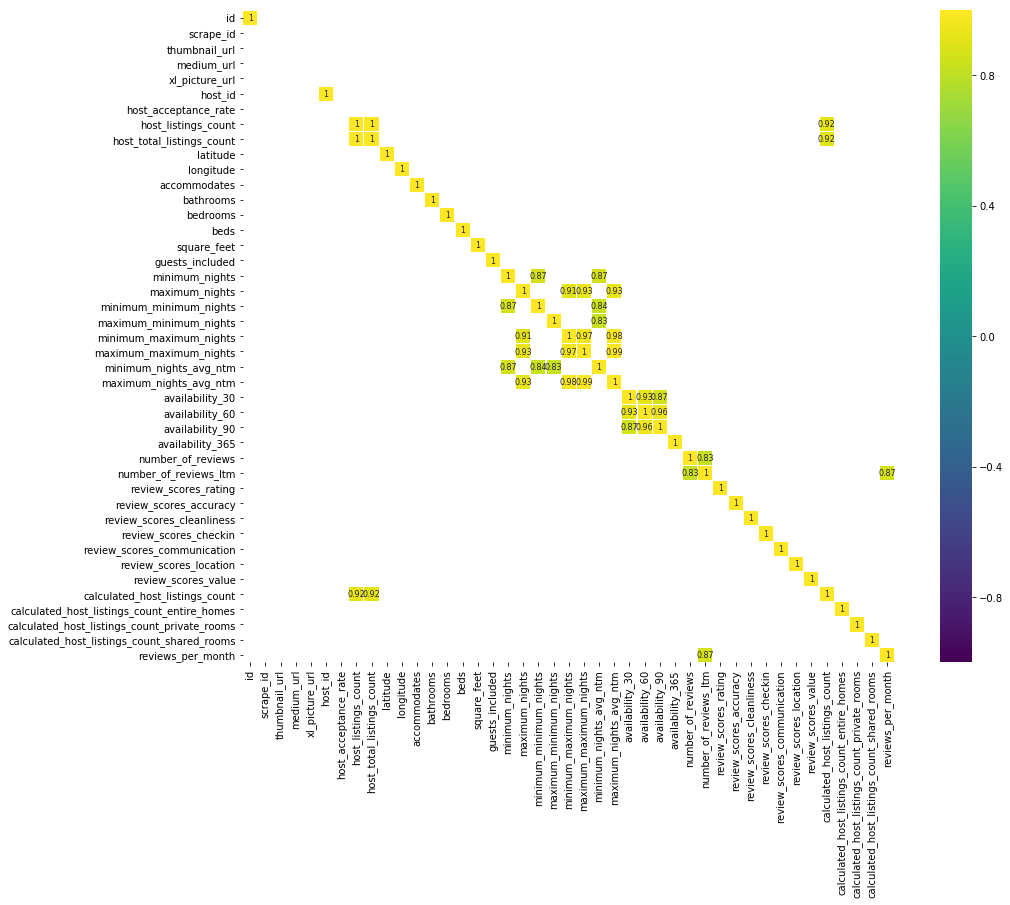

In [43]:
plt.figure(figsize=(16, 12))

sns.heatmap(corr[(corr >= 0.8) | (corr <= -0.8)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

In [14]:
import sys
# !{sys.exeutable} -m pip install --upgrade pip

In [129]:
! pip install re

ERROR: Could not find a version that satisfies the requirement re (from versions: none)
ERROR: No matching distribution found for re


In [22]:
!python -m pip show requests

Name: requests
Version: 2.19.1
Summary: Python HTTP for Humans.
Home-page: http://python-requests.org
Author: Kenneth Reitz
Author-email: me@kennethreitz.org
License: Apache 2.0
Location: c:\users\ieva\anaconda3\lib\site-packages
Requires: certifi, urllib3, chardet, idna
Required-by: Sphinx, robobrowser, pipwin, gmplot, conda, conda-build, anaconda-project, anaconda-client


In [4]:
!{sys.executbable} -m pip install fiona

    ERROR: Command errored out with exit status 1:
     command: 'C:\Users\Ieva\Anaconda3\python.exe' -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\Ieva\\AppData\\Local\\Temp\\pip-install-ux8l066y\\fiona\\setup.py'"'"'; __file__='"'"'C:\\Users\\Ieva\\AppData\\Local\\Temp\\pip-install-ux8l066y\\fiona\\setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' egg_info --egg-base 'C:\Users\Ieva\AppData\Local\Temp\pip-install-ux8l066y\fiona\pip-egg-info'
         cwd: C:\Users\Ieva\AppData\Local\Temp\pip-install-ux8l066y\fiona\
    Complete output (1 lines):
    A GDAL API version must be specified. Provide a path to gdal-config using a GDAL_CONFIG environment variable or use a GDAL_VERSION environment variable.
    ----------------------------------------
ERROR: Command errored out with exit status 1: python setup.py egg_info Check the logs for full co

In [ ]:
pip install wheels
pip install pipwin

pipwin install numpy
pipwin install pandas
pipwin install shapely
pipwin install gdal
pipwin install fiona
pipwin install pyproj
pipwin install six
pipwin install rtree
pipwin install geopandas

In [8]:
!{sys.executbable} -m pip install pandas

'{sys.executbable}' is not recognized as an internal or external command,
operable program or batch file.


In [68]:
BBox = ((detailed_listings.longitude.min(),   detailed_listings.longitude.max(),      
         detailed_listings.latitude.min(), detailed_listings.latitude.max()))


In [69]:
BBox

(12.1739, 12.42032, 45.27756, 45.53685)

In [79]:
ruh_m = plt.imread('map.png')

ValueError: invalid PNG header

In [85]:
# import gmplot package 
import gmplot 
  
latitude_list = [30.3358376, 30.307977, 30.3216419, 30.3427904, 30.378598, 30.3548185, 30.3345816, 30.387299, 30.3272198, 30.3840597, 30.4158, 30.340426, 30.3984348, 30.3431313, 30.273471] 
  
longitude_list = [77.8701919, 78.048457, 78.0413095, 77.886958, 77.825396, 77.8460573, 78.0537813, 78.090614, 78.0355272, 77.9311923, 77.9663, 77.952092, 78.0747887, 77.9555512, 77.9997158] 
  
# gmap4 = gmplot.GoogleMapPlotter.from_geocode("India") 
gmap = gmplot.GoogleMapPlotter.from_geocode("San Francisco") 
# heatmap plot heating Type 
# points on the Google map 
# gmap4.heatmap( latitude_list, longitude_list ) 
  
# gmap4.draw( "C:\\Users\\user\\Desktop\\map14.html" ) 

IndexError: list index out of range

In [86]:
gmap = gmplot.GoogleMapPlotter(37.428, -122.145, 16)

gmap.plot(latitudes, longitudes, 'cornflowerblue', edge_width=10)
gmap.scatter(more_lats, more_lngs, '#3B0B39', size=40, marker=False)
gmap.scatter(marker_lats, marker_lngs, 'k', marker=True)
gmap.heatmap(heat_lats, heat_lngs)

gmap.draw("mymap.html")

NameError: name 'latitudes' is not defined

In [88]:
# GoogleMapPlotter return Map object
# Pass the center latitude and
# center longitude
gmap1 = gmplot.GoogleMapPlotter(30.3164945,
                                78.03219179999999, 13 )

# Pass the absolute path
gmap1.draw( "test_map11.html" )

In [90]:
latitude_list = [ 30.3358376, 30.307977, 30.3216419 ]
longitude_list = [ 77.8701919, 78.048457, 78.0413095 ]

gmap3 = gmplot.GoogleMapPlotter(30.3164945,
                                78.03219179999999, 13)

# scatter method of map object 
# scatter points on the google map
gmap3.scatter( latitude_list, longitude_list, '# FF0000',
                              size = 40, marker = False )

# Plot method Draw a line in
# between given coordinates
gmap3.plot(latitude_list, longitude_list, 
           'cornflowerblue', edge_width = 2.5)

gmap3.draw( "2.html" )

In [93]:
latitude_list = [30.3358376, 30.307977, 30.3216419, 30.3427904,
                  30.378598, 30.3548185, 30.3345816, 30.387299,
                    30.3272198, 30.3840597, 30.4158, 30.340426,
                             30.3984348, 30.3431313, 30.273471]

longitude_list = [77.8701919, 78.048457, 78.0413095, 77.886958,
                  77.825396, 77.8460573, 78.0537813, 78.090614,
                    78.0355272, 77.9311923, 77.9663, 77.952092,
                            78.0747887, 77.9555512, 77.9997158]

gmap4 = gmplot.GoogleMapPlotter(30.3164945,
                                78.03219179999999, 13)

# heatmap plot heating Type
# points on the Google map
gmap4.heatmap( latitude_list, longitude_list )
gmap4.draw( "4.html" )


In [98]:
from IPython.display import HTML
HTML(filename='4.html')

In [37]:
from IPython.display import IFrame

IFrame(src='4.html', width=700, height=600)


In [111]:
import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon

ModuleNotFoundError: No module named 'geopandas'

In [4]:
import sys
# !conda install --yes --prefix {sys.prefix} geopandas

In [2]:
!{sys.executable} -m pip install fiona

'{sys.executable}' is not recognized as an internal or external command,
operable program or batch file.


In [ ]:
print("a")